In [5]:
%pip install shapely

Note: you may need to restart the kernel to use updated packages.


,N Paquete/ID,Programa,Origen,Destino,Fecha de Inicio,Fecha de termino,Noches cama,Alojamiento,X,Y,TOTAL,VTE,TF,GE,X_decimal,Y_decimal
0,R210303006,VTE,Caldera,Alto del Carmen,27-06-2022,29-06-2022,2,Complejo Deportivo Portezuelo,"70° 29' 11,636"" W","28° 45' 35,216"" S",537,537,0,0,-70.486566,-28.759782
1,R210303006,VTE,Caldera,Alto del Carmen,27-06-2022,29-06-2022,2,Complejo Deportivo Portezuelo,"70° 29' 11,636"" W","28° 45' 35,216"" S",537,537,0,0,-70.486566,-28.759782
2,R210303006,VTE,Caldera,Alto del Carmen,27-06-2022,29-06-2022,2,Complejo Deportivo Portezuelo,"70° 29' 11,636"" W","28° 45' 35,216"" S",537,537,0,0,-70.486566,-28.759782
3,R210303006,VTE,Caldera,Alto del Carmen,27-06-2022,29-06-2022,2,Complejo Deportivo Portezuelo,"70° 29' 11,636"" W","28° 45' 35,216"" S",537,537,0,0,-70.486566,-28.759782
4,R210303006,VTE,Caldera,Alto del Carmen,27-06-2022,29-06-2022,2,Complejo Deportivo Portezuelo,"70° 29' 11,636"" W","28° 45' 35,216"" S",537,537,0,0,-70.486566,-28.759782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71535,22070519,TF,VALPARAÍSO,VIÑA DEL MAR,23-09-2022,25-09-2022,2,HC REÑACA,"71° 33' 12,790"" W","33° 1' 24,465"" S",6278,3546,938,1794,-71.553553,-33.023463
71536,22070519,TF,VALPARAÍSO,VIÑA DEL MAR,23-09-2022,25-09-2022,2,HC REÑACA,"71° 33' 12,790"" W","33° 1' 24,465"" S",6278,3546,938,1794,-71.553553,-33.023463
71537,22070519,TF,VALPARAÍSO,VIÑA DEL MAR,23-09-2022,25-09-2022,2,HC REÑACA,"71° 33' 12,790"" W","33° 1' 24,465"" S",6278,3546,938,1794,-71.553553,-33.023463
71538,22070519,TF,VALPARAÍSO,VIÑA DEL MAR,23-09-2022,25-09-2022,2,HC REÑACA,"71° 33' 12,790"" W","33° 1' 24,465"" S",6278,3546,938,1794,-71.553553,-33.023463


C:\Users\n3mes\AppData\Local\Temp\ipykernel_28640\2720214305.py:55: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


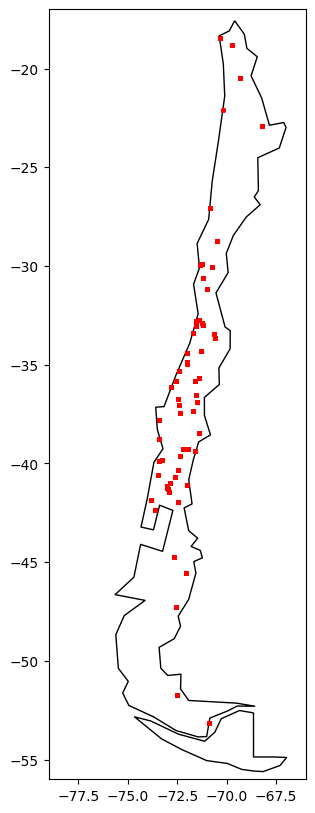

In [6]:
import pandas as pd
import geopandas as gpd
import re
from shapely.geometry import Point
import matplotlib.pyplot as plt

def dms2dec(dms_str):
    """Convierte una cadena de coordenadas DMS (grados, minutos, segundos) a coordenadas decimales."""
    dms_str = re.sub(r'\s', '', dms_str)
    dms_str = re.sub(r'°', ' ', dms_str)
    dms_str = re.sub(r'\'', ' ', dms_str)
    dms_str = re.sub(r'\"', ' ', dms_str)
    parts = dms_str.split()

    d = float(parts[0])
    m = float(parts[1].replace(',', '.'))
    s = float(parts[2].replace(',', '.'))

    dd = d + m/60 + s/3600
    return dd

def safe_dms2dec(dms_str):
    if pd.notna(dms_str):
        try:
            return -dms2dec(dms_str)
        except:
            return None
    return None

# Ruta al archivo CSV
file_path = "./Informe Noches Cama 2022final.csv"

# Cargamos el archivo CSV
df = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=';', header=2)

# Convertimos las coordenadas DMS a decimal
df['X_decimal'] = df['X'].apply(safe_dms2dec)
df['Y_decimal'] = df['Y'].apply(safe_dms2dec)

# Eliminamos filas con coordenadas no válidas
df_valid = df.dropna(subset=['X_decimal', 'Y_decimal'])
display(df_valid)

# Creamos objetos Point de Shapely para las coordenadas
geometry = [Point(xy) for xy in zip(df_valid['X_decimal'], df_valid['Y_decimal'])]
gdf = gpd.GeoDataFrame(df_valid, geometry=geometry)

# Definimos los límites del mapa para enfocar en la zona norte de Chile
map_bounds = {
    'xmin': -79, 'xmax': -66, 'ymin': -56, 'ymax': -17
}

# Graficamos los puntos en el mapa enfocado en la zona norte de Chile
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world[world.name == 'Chile'].plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, marker='o', color='red', markersize=5)

# Configuramos el área visible del mapa
ax.set_xlim([map_bounds['xmin'], map_bounds['xmax']])
ax.set_ylim([map_bounds['ymin'], map_bounds['ymax']])
plt.show()



C:\Users\n3mes\AppData\Local\Temp\ipykernel_28640\767984188.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


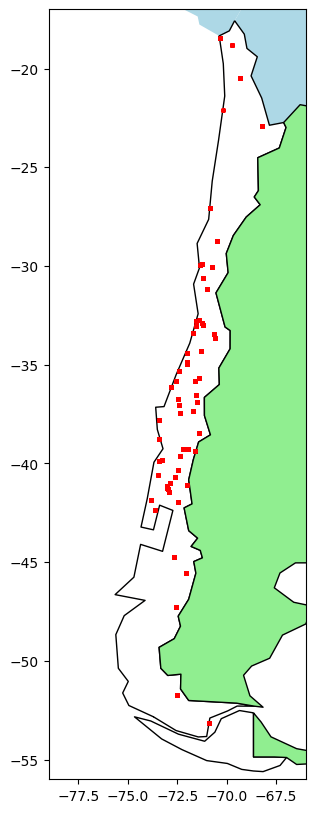

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargamos los datos geográficos de los países
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Configuración del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Dibujar el mapa base, Chile y Argentina
world.plot(ax=ax, color='lightblue')  # Océano y otros países
world[world.name == 'Chile'].plot(ax=ax, color='white', edgecolor='black')  # Chile
world[world.name == 'Argentina'].plot(ax=ax, color='lightgreen', edgecolor='black')  # Argentina

# Dibujar los puntos (asegúrate de que 'gdf' esté definido como antes)
gdf.plot(ax=ax, marker='o', color='red', markersize=5)

# Configuración de los límites del mapa
ax.set_xlim(map_bounds['xmin'], map_bounds['xmax'])
ax.set_ylim(map_bounds['ymin'], map_bounds['ymax'])

plt.show()


In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Rutas a los archivos shapefile
file_regiones = './REGIONES/REGIONES_v1.shp'  # Reemplaza si es necesario
file_provincias = './PROVINCIAS/PROVINCIAS_v1.shp'  # Reemplaza si es necesario

# Cargamos los datos geográficos
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
regiones_chile = gpd.read_file(file_regiones)
#provincias_chile = gpd.read_file(file_provincias)

# Configuración del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Dibujar el mapa base, Chile y Argentina
#world.plot(ax=ax, color='lightblue')  # Océano y otros países
world[world.name == 'Chile'].plot(ax=ax, color='white', edgecolor='black')  # Chile
world[world.name == 'Argentina'].plot(ax=ax, color='lightgreen', edgecolor='black')  # Argentina

# Dibujar regiones y provincias de Chile
regiones_chile.plot(ax=ax, edgecolor='blue', facecolor='none')  # Regiones

# Dibujar los puntos (asegúrate de que 'gdf' esté definido como antes)
gdf.plot(ax=ax, marker='o', color='red', markersize=5)


# Dibujar los gráficos de pastel en cada punto
for idx, row in gdf.iterrows():
    sizes = [row['VTE'], row['TF'], row['GE']]
    total = sum(sizes)
    if total > 0:  # Evitar división por cero
        sizes = [x / total for x in sizes]  # Normaliza los valores para que sumen 100%
        ax.pie(sizes, center=(row.geometry.x, row.geometry.y), radius=0.5, colors=['blue', 'green', 'orange'], startangle=90)

ax.set_xlim([-80, -65])
ax.set_ylim([-56, -17])

plt.show()


C:\Users\n3mes\AppData\Local\Temp\ipykernel_28640\4146668652.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
